In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_imgs/cillian_murphy.jpg')
img.shape

(887, 634, 3)

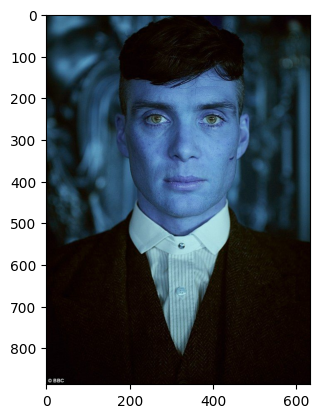

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(887, 634)

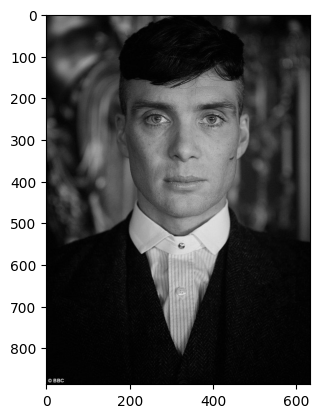

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[141, 104, 377, 377]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(141, 104, 377, 377)

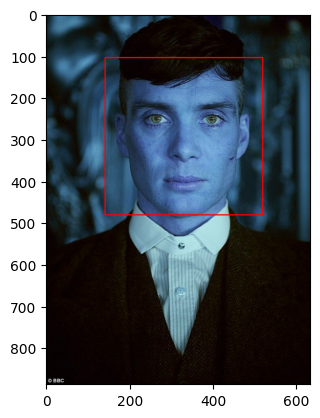

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

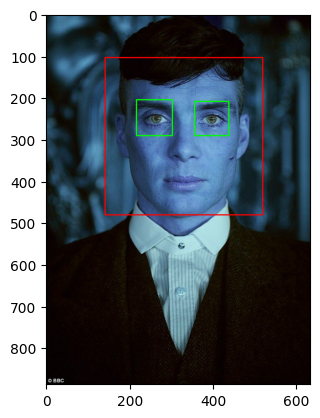

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

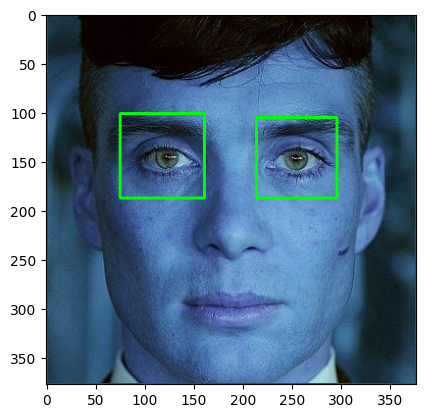

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
# plt.imshow(roi_gray, cmap='gray')

In [11]:
def get_cropped_img_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

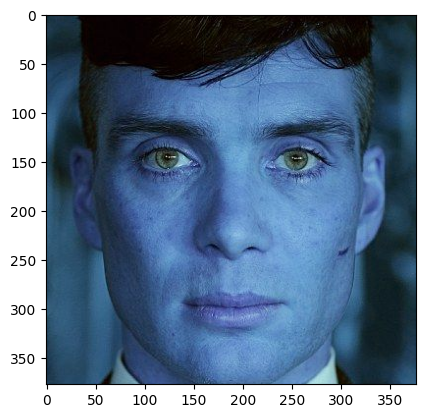

In [12]:
cropped_img = get_cropped_img_if_2_eyes('./test_imgs/cillian_murphy.jpg')
plt.imshow(cropped_img)

In [13]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;

    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint(imArray_H)

    return imArray_H

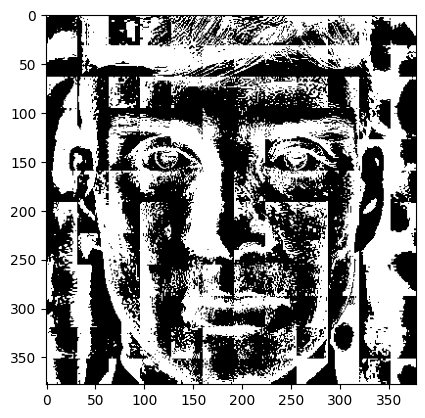

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [20]:
path_to_data = './dataset/'
path_to_cr_data='./dataset/cropped/'

In [21]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./dataset/cillian murphy',
 './dataset/Lionel Messi',
 './dataset/martin scorsese',
 './dataset/ryan gosling',
 './dataset/Virat']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_img_dirs=[]
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print('Generating cropped imgs in folder: ', cropped_folder)

            cropped_filename = celebrity_name + str(count) + '.jpg'
            cropped_filepath = cropped_folder + '/' + cropped_filename

            cv2.imwrite(cropped_filepath, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_filepath)
            count+=1 

cillian murphy
Generating cropped imgs in folder:  ./dataset/cropped/cillian murphy
Lionel Messi
Generating cropped imgs in folder:  ./dataset/cropped/Lionel Messi
martin scorsese
Generating cropped imgs in folder:  ./dataset/cropped/martin scorsese
ryan gosling
Generating cropped imgs in folder:  ./dataset/cropped/ryan gosling
Virat
Generating cropped imgs in folder:  ./dataset/cropped/Virat


In [25]:
celebrity_file_names_dict

{'cillian murphy': ['./dataset/cropped/cillian murphy/cillian murphy1.jpg',
  './dataset/cropped/cillian murphy/cillian murphy2.jpg',
  './dataset/cropped/cillian murphy/cillian murphy3.jpg',
  './dataset/cropped/cillian murphy/cillian murphy4.jpg',
  './dataset/cropped/cillian murphy/cillian murphy5.jpg',
  './dataset/cropped/cillian murphy/cillian murphy6.jpg',
  './dataset/cropped/cillian murphy/cillian murphy7.jpg',
  './dataset/cropped/cillian murphy/cillian murphy8.jpg',
  './dataset/cropped/cillian murphy/cillian murphy9.jpg',
  './dataset/cropped/cillian murphy/cillian murphy10.jpg',
  './dataset/cropped/cillian murphy/cillian murphy11.jpg',
  './dataset/cropped/cillian murphy/cillian murphy12.jpg',
  './dataset/cropped/cillian murphy/cillian murphy13.jpg',
  './dataset/cropped/cillian murphy/cillian murphy14.jpg',
  './dataset/cropped/cillian murphy/cillian murphy15.jpg',
  './dataset/cropped/cillian murphy/cillian murphy16.jpg',
  './dataset/cropped/cillian murphy/cillian mur

In [26]:
celebrity_file_names_dict = {}
for img_dir in cropped_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict
        

{'cillian murphy': ['./dataset/cropped/cillian murphy\\cillian murphy1.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy10.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy11.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy12.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy13.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy14.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy15.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy16.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy17.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy18.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy19.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy2.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy20.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy21.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy22.jpg',
  './dataset/cropped/cillian murphy\\cillian murphy23.jpg',
  './dataset/cropped/cil

In [27]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count +1
class_dict

{'cillian murphy': 0,
 'Lionel Messi': 1,
 'martin scorsese': 2,
 'ryan gosling': 3,
 'Virat': 4}

In [28]:
X=[]
Y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        if img is None:
            continue
        scaled_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        img_har = img_har.astype('uint8')
        scaled_wv_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack([scaled_img.reshape(32*32*3,1), scaled_wv_img_har.reshape(32*32,1)])
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])

In [29]:
len(X)

257

In [30]:
len(Y)

257

In [31]:
32*32*3 + 32*32

4096

In [32]:
len(X[0])

4096

In [33]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(257, 4096)

In [34]:
X[0]

array([18., 32., 61., ...,  0.,  0.,  0.])

In [35]:
X

array([[ 18.,  32.,  61., ...,   0.,   0.,   0.],
       [195., 193., 197., ...,  41.,  41.,  41.],
       [ 10.,  11.,  11., ...,  64.,   0.,   1.],
       ...,
       [246., 174., 136., ...,   8.,   4., 251.],
       [ 17.,  33.,  55., ...,  33.,  63., 196.],
       [228., 114.,  27., ..., 247., 159.,  46.]])

In [36]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.7692307692307693

In [39]:
len(X_test)

65

In [40]:
len(X_train)

192

In [41]:
len(Y_train)

192

In [42]:
len(Y_test)

65

In [43]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       1.00      0.80      0.89        10
           2       0.73      0.67      0.70        12
           3       0.79      0.88      0.84        26
           4       0.83      0.56      0.67         9

    accuracy                           0.77        65
   macro avg       0.78      0.73      0.74        65
weighted avg       0.79      0.77      0.77        65



In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
model_params={
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C':[1,5,10]
        }
    }
}

In [46]:
scores=[]
best_estimators={}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'],cv=5, return_train_score=False)
    clf.fit(X_train,Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.792173,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.703104,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.766262,{'logisticregression__C': 10}


In [47]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [48]:
best_estimators['svm'].score(X_test,Y_test)

0.8307692307692308

In [49]:
best_estimators['random_forest'].score(X_test,Y_test)

0.5692307692307692

In [50]:
best_estimators['logistic_regression'].score(X_test,Y_test)

0.7846153846153846

In [51]:
best_clf = best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  1,  0],
       [ 0,  9,  0,  0,  1],
       [ 3,  0,  9,  0,  0],
       [ 0,  0,  3, 23,  0],
       [ 2,  0,  0,  1,  6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

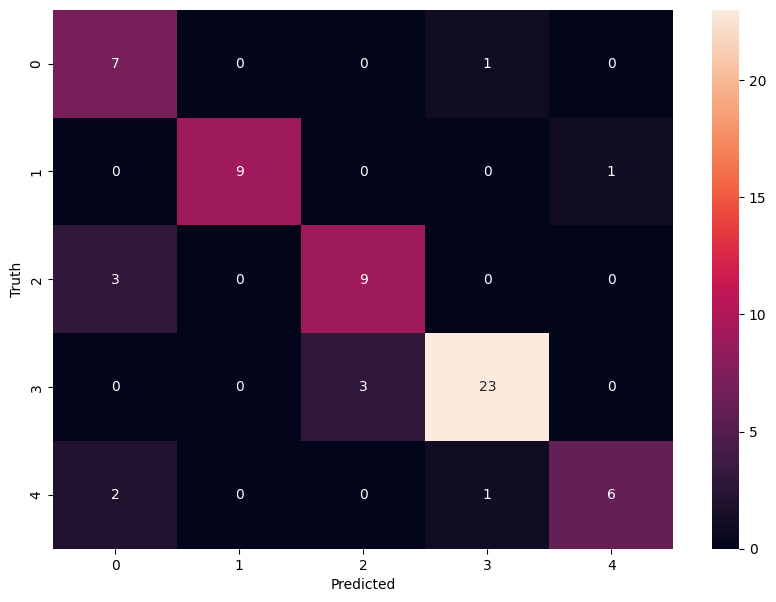

In [53]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
class_dict

{'cillian murphy': 0,
 'Lionel Messi': 1,
 'martin scorsese': 2,
 'ryan gosling': 3,
 'Virat': 4}

In [55]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [56]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))